# Introduction to Gradient Descent

## Introduction 

In previous sections we used Scikit-Learn, Statsmodels and ad-hoc OLS programming to find the best fit line when building a linear regression model. We also mentioned, however, that using closed-form Ordinary Least Squares programming might become computationally expensive when there are many features. Therefore, iterative algorithms like the *gradient descent* algorithm are the basis of many models in statistics and machine learning!

You previously saw how after choosing the slope and y-intercept values of a regression line, we can calculate the residual sum of squares (RSS) and related root mean squared error.  We can use either the RSS or RMSE to calculate the accuracy of a line. In this lesson we'll use the RSS to iteratively find the best fit line for our problem at hand!

Once calculating the accuracy of a line, we are pretty close to improving upon a line by minimizing the RSS.  This is the task of the gradient descent technique.  But before learning about gradient descent, let's review and ensure that we understand how to evaluate how our line fits our data.  

## Objectives 

You will be able to:
* Understand how to go from RSS to finding a "best fit" line
* Understand a cost curve and what it displays

## Review of plotting our data and a regression line

For this example, let's imagine that we have an predictor $x$ and a dependent variable $y$. We construct or data in a way that we know that the "actual" line that we're looking at has an 
- intercept, $\beta_0$ of 3 (which we will refer to as $b$ when estimating it)
- $\beta_1$ of 50 (which we will refer to as $m$ when estimating it)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

#data = np.array([x, y])

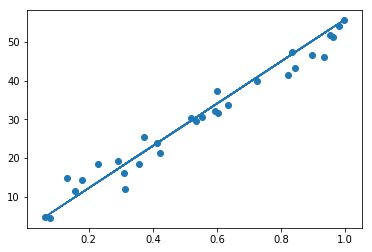

In [8]:
# Added by me:
plt.scatter(x,y)
plt.plot(x, build_regression_line(x,y)['slope'] *x + build_regression_line(x,y)['int'])

In [2]:
from linear_equations import build_regression_line

In [3]:
build_regression_line(x,y)

{'slope': 54.550106055369, 'int': 1.3188915249780635}

Let's again come up with some numbers for a slope and a y-intercept.  

>One (not so great) technique to get the slope, is by drawing a line between the first and last points.  And from there, we calculate the value of $b$.  You can use the `build_regression_line` function, defined in our linear_equations library, `linear_equatuions.py`, which quickly does this for us.

Let's pass $x$ and $y$ into our `build_regression_line` function. 

Turning this into a regression formula, we have the following.

In [9]:
def regression_formula(x):
    return 1.319 + 54.550*x

Let's plot this regression formula with our data to get a sense of what it looks like. 

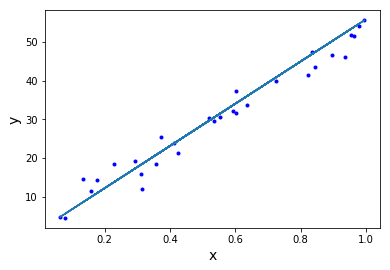

In [6]:
np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

## Evaluating the regression line

From there, we can calculate the `residual sum of squared errors` and the `root mean squared error`.

In [10]:
import math

def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b)))/len(x_values), 2)

In [11]:
squared_errors(x, y, 54.550, 1.319 )

array([ 4.44,  0.84, 20.68, 14.68,  2.43, 13.23, 10.31, 10.61,  1.2 ,
        2.04, 38.08,  5.67, 15.21,  0.43,  2.41, 23.48, 37.39,  4.93,
        0.38,  0.7 ,  0.  ,  0.  ,  5.65,  6.94, 40.66,  0.23,  0.89,
        0.  , 11.44,  5.04])

In [12]:
residual_sum_squares(x, y, 54.550, 1.319) 

279.99

In [13]:
root_mean_squared_error(x, y, 54.550, 1.319) 

0.56

We can see that the RSS is equal to 279.99 and the RMSE is 0.56 for our regression line! Do you think we can do better?

### Moving towards gradient descent

Now that we have the residual sum of squares function to evaluate the accuracy of our regression line, we can simply try out different regression lines and use the regression line that has the lowest RSS.  The regression line that produces the lowest RSS for a given dataset is called the "best fit" line for that dataset.  

So this will be our technique for finding our "best fit" line:

> * Choose a regression line with a guess of values for $m$ and $b$
> * Calculate the RSS
> * Adjust $m$ and $b$, as these are the only things that can vary in a single-variable regression line.
> * Again calculate the RSS 
> * Repeat this process
> * The regression line (that is, the values of $b$ and $m$) with the smallest RSS is our **best fit line**

We'll eventually tweak and improve upon that process, but for now it will do.  In fact, we will make things even easier at first by holding $b$ fixed to a constant value while we experiment with different $m$ values.  In later lessons, we will change both variables.

#### Updating the regression line to improve accuracy

Ok, so we have a regression line of $\overline{y} = \overline{m}x + \overline{b} $, and we started with values of $b = 1.319 $ and $m = 54.550 $.  Then seeing how well this regression line matched our dataset, we calculated that $ RSS = 279.99 $.  Our next step is to plug in different values of $b$ and see how RSS changes.  Let's try $m$ = 54 instead of $54.550$.

In [18]:
residual_sum_squares(x, y, 54, 1.319)

257.35

We can see that the RSS is already lower here! Now let's the RSS for a variety of $m$ values. We'll look at $m$-values between 40 and 59.

In [21]:
table = np.zeros((20,2))
for idx, val, chichi in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    table[idx,3] = 'Peanuts'

ValueError: not enough values to unpack (expected 3, got 2)

In [13]:
table

array([[  40.  , 2012.31],
       [  41.  , 1738.24],
       [  42.  , 1487.03],
       [  43.  , 1258.71],
       [  44.  , 1053.31],
       [  45.  ,  870.75],
       [  46.  ,  711.05],
       [  47.  ,  574.3 ],
       [  48.  ,  460.37],
       [  49.  ,  369.35],
       [  50.  ,  301.17],
       [  51.  ,  255.89],
       [  52.  ,  233.49],
       [  53.  ,  234.  ],
       [  54.  ,  257.35],
       [  55.  ,  303.64],
       [  56.  ,  372.74],
       [  57.  ,  464.75],
       [  58.  ,  579.66],
       [  59.  ,  717.43]])

Notice what the above table represents.  While keeping our value of $b$ fixed at 1.319, we moved towards a smaller residual sum of squares (RSS) by changing our value of $m$, our slope. 

Setting $m$ to 54 produced a lower error than at 54.550.  We kept moving our $b$ value lower until we set $m$ = 52, at which point our error began to increase.  Therefore, we know that a value of $b$ between 52 and 53 produces the smallest RSS for our data while $b = 1.319$. 

This changing output of RSS based on a changing input of different regression lines is called our **cost function**.  Let's plot this chart to see it better.

We set:

* `m_values` as the input values (x values), and
* `rss_errors` as the output values (y values)

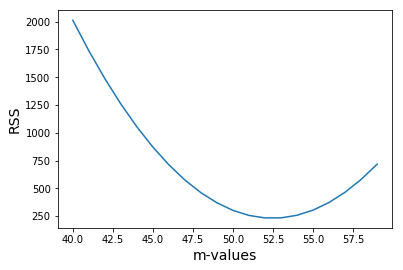

In [14]:
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14);

The graph above is called the **cost curve**.  It is a plot of the RSS for different values of $m$.    The curve demonstrates that when $m$ is between 52 and 53, the RSS is lowest.  This technique of optimizing towards a minimum value is called *gradient descent*.  Here, we *descend* along a cost curve.  As we change our variable, we need to stop when the value of our RSS no longer decreases.

Note that we end up with a m-value which is not quite the same as $m$ the value which generated the data. The reason for this is 2-fold:
- We used a value for $b$ which was equal to 1.319, which was quite far from the actual value of 3. Therefore, there is a measurement in error for the slope.
- Secondly, randomness was (intentionally) included in our data, so even with the best algorithm, we would come up with a value *close* to 50, but not exactly 50!

## Summary

In this section we saw the path from going from calculating the RSS for a given regression line, to finding a line that minimizes our RSS - a best fit line.  We learned that we can move to a better regression line by descending along our cost curve.  Going forward, we will learn how to move towards our best fit line in an efficient manner. 